In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2. Set Dataset Path
dataset_path = '/content/drive/MyDrive/Tree /Tree_Species_Dataset'
!ls /content/drive/MyDrive/
!ls -l "/content/drive/MyDrive/Tree /Tree_Species_Dataset"

 AI_Generalist_Roadmap.pdf	 pro
'Colab Notebooks'		 Projects
'NSS CAMP VIDEO.mp4'		'Tree '
 personal-portfolio-master.zip	 tree_species_model_best.h5
total 20
drwx------ 2 root root 4096 Jul 25 02:06 amla
drwx------ 2 root root 4096 Jul 25 02:06 asopalav
drwx------ 2 root root 4096 Jul 25 02:06 babul
drwx------ 2 root root 4096 Jul 25 02:06 bamboo
drwx------ 2 root root 4096 Jul 25 02:06 banyan


Found 234 files belonging to 5 classes.
Using 188 files for training.
Found 234 files belonging to 5 classes.
Using 46 files for validation.
Class Labels: ['amla', 'asopalav', 'babul', 'bamboo', 'banyan']
Shape of training data: 6
Shape of validation data: 2


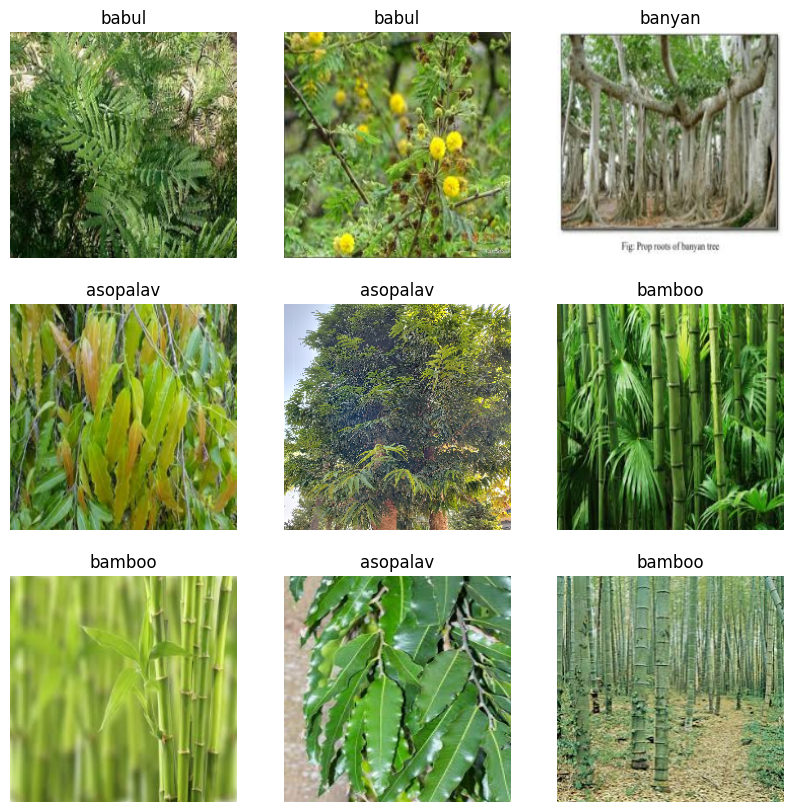

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Class Labels:", class_names)

print("Shape of training data:", tf.data.experimental.cardinality(train_ds).numpy())
print("Shape of validation data:", tf.data.experimental.cardinality(val_ds).numpy())

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
!ls -l "/content/drive/MyDrive/Tree "

total 150924
-rw------- 1 root root 76301434 Jul 24 03:27 'Dataset for tree specific classification .zip'
drwx------ 8 root root     4096 Jul 25 02:39  Tree_Species_Dataset
-rw------- 1 root root 78239938 Jul 24 03:22  Tree_species-master.zip


In [ ]:
from tensorflow.keras import layers, Input

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE[0], IMAGE_SIZE[1]),
  layers.Rescaling(1./255),
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
n_classes = num_classes

model = tf.keras.models.Sequential([
    Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


In [1]:
from tensorflow.keras import layers, models

input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
n_classes = num_classes

model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

NameError: name 'IMAGE_SIZE' is not defined

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [2]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3),
    ModelCheckpoint('/content/drive/MyDrive/tree_species_model_best.h5', monitor='val_accuracy', save_best_only=True)
]

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks
)


Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.2271 - loss: 1.7400

6/6 ━━━━━━━━━━━━━━━━━━━━ 85s 13s/step - accuracy: 0.2304 - loss: 1.7269 - val_accuracy: 0.4783 - val_loss: 1.3668 - learning_rate: 0.0010
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5597 - loss: 1.2929

6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5626 - loss: 1.2835 - val_accuracy: 0.6957 - val_loss: 1.0796 - learning_rate: 0.0010
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7177 - loss: 0.9703

6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7223 - loss: 0.9617 - val_accuracy: 0.8261 - val_loss: 0.8827 - learning_rate: 0.0010
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7938 - loss: 0.7926

6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7951 - loss: 0.7888 - val_accuracy: 0.8478 - val_loss: 0.7450 - learning_rate: 0.0010
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8192 - loss: 0.6720

6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8222 - loss: 0.6694 - val_accuracy: 0.8696 - val_loss: 0.6358 - learning_rate: 0.0010
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8736 - loss: 0.6010

6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8749 - loss: 0.5951 - val_accuracy: 0.9130 - val_loss: 0.5609 - learning_rate: 0.0010
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8841 - loss: 0.4727 - val_accuracy: 0.9130 - val_loss: 0.5117 - learning_rate: 0.0010
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8608 - loss: 0.4598 - val_accuracy: 0.9130 - val_loss: 0.4640 - learning_rate: 0.0010
Epoch 9/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9249 - loss: 0.3460 - val_accuracy: 0.9130 - val_loss: 0.4290 - learning_rate: 0.0010
Epoch 10/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9131 - loss: 0.3715

6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9141 - loss: 0.3697 - val_accuracy: 0.9565 - val_loss: 0.4019 - learning_rate: 0.0010
Epoch 11/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9556 - loss: 0.3273 - val_accuracy: 0.9565 - val_loss: 0.3851 - learning_rate: 0.0010
Epoch 12/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9518 - loss: 0.2781 - val_accuracy: 0.9565 - val_loss: 0.3698 - learning_rate: 0.0010
Epoch 13/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9286 - loss: 0.2970 - val_accuracy: 0.9565 - val_loss: 0.3552 - learning_rate: 0.0010
Epoch 14/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9724 - loss: 0.2508 - val_accuracy: 0.9565 - val_loss: 0.3398 - learning_rate: 0.0010
Epoch 15/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9264 - loss: 0.2702 - val_accuracy: 0.9565 - val_loss: 0.3289 - learning_rate: 0.0010


In [3]:
model.save('/content/drive/MyDrive/tree_species_model_vj.h5')

NameError: name 'model' is not defined

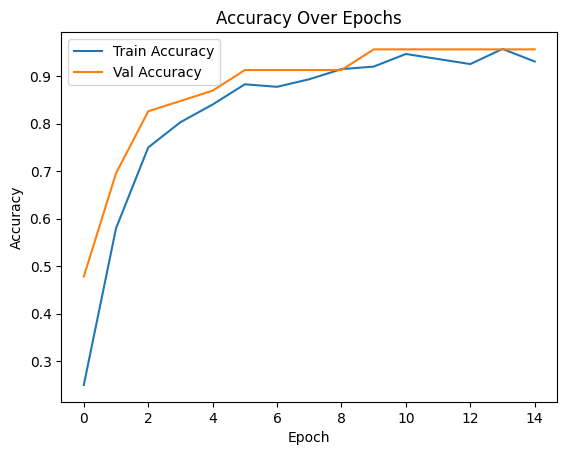

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
